In [1]:
#import and read in data
import numpy as np
import pandas
#supress warning generated by random.choice
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data=pandas.read_csv('pres16results.csv')

In [2]:
#Combine all counties
#combinedCounties=[]
#countyPopulation=[]
#countyWinner=[]
#countyState=[]
#skip=0
#for x in range(0,len(data)):
#    for y in range(0,len(combinedCounties)):
#        if (data['county'][x]==combinedCounties[y] or pandas.isnull(data['county'][x])==True):
#            skip=1
#    if (skip==0):
#        combinedCounties.append(data['county'][x])
#        countyPopulation.append(data['total_votes'][x])
#        countyWinner.append(data['lead'][x])
#        countyState.append(data['st'][x])
#    skip=0
#for x in range(0,len(combinedCounties)):
    #print(combinedCounties[x],countyState[x],countyPopulation[x],countyWinner[x])

In [3]:
#define all variables needed to split data
countyTemp=data['county']
county=[]
fipsTemp=data['fips']
fips=[]
nameTemp = data['cand']
name=[]
stateTemp=data['st']
state=[]
pct_reportTemp=data['pct_report']
pct_report=[]
numVotesTemp=data['votes']
numVotes=[]
totalVotesTemp=data['total_votes']
totalVotes=[]
percentVotesTemp=data['pct']
percentVotes=[]
leaderTemp=data['lead']
leader=[]


In [4]:
#split data columns into different variables
learnSize=0.75
startOfStates=32 #gets rid of all country wide rows
sizeOfData=int(len(data)*learnSize)-startOfStates

randomOrder=[]
for x in range(startOfStates,int(len(data))):
    randomOrder.append(x)
np.random.shuffle(randomOrder)



for x in range(0,int(len(randomOrder)*learnSize)):
    #county name
    county.append(countyTemp[randomOrder[x]])
    #FIPS of county or State
    fips.append(fipsTemp[randomOrder[x]])
    #candidate name
    name.append(nameTemp[randomOrder[x]])
    #state
    state.append(stateTemp[randomOrder[x]])
    #pct_report
    pct_report.append(pct_reportTemp[randomOrder[x]])
    #number of votes
    numVotes.append(numVotesTemp[randomOrder[x]])
    #total_votes (state)
    totalVotes.append(totalVotesTemp[randomOrder[x]])
    #percentage of all votes
    percentVotes.append(percentVotesTemp[randomOrder[x]])
    #leader in state
    leader.append(leaderTemp[randomOrder[x]])
    
    #randomOrder[x]=-1


In [5]:
#gets list of candidate names
listOfNames=[]
alreadyInList=0 #boolean 0 if not in list, 1 if it is in the list
for x in range(0,sizeOfData):
    if (not(name[x]in listOfNames)):
        listOfNames.append(name[x])
print(listOfNames)

['Jill Stein', 'Gary Johnson', 'Rocky De La Fuente', 'Darrell Castle', 'Tom Hoefling', 'Hillary Clinton', 'Jerry White', 'Donald Trump', 'Evan McMullin', 'Dan Vacek', 'Gloria La Riva', 'Alyson Kennedy', 'Emidio Soltysik', 'Jim Hedges', 'Rod Silva', 'Kyle Kopitke', 'Lynn Kahn', 'Michael Maturen', 'Chris Keniston', 'Peter Skewes', 'Laurence Kotlikoff', 'Joseph Maldonado', ' None of these candidates', 'Monica Moorehead', 'Scott Copeland', 'Richard Duncan', 'Bradford Lyttle', 'Ryan Scott', 'Mike Smith', 'Frank Atwood', 'Princess Jacob', 'Rocky Giordani']


In [6]:
#get list of states
listOfStates=[]
alreadyInList=0#boolean 0 if not in list, 1 if it is in the list
for x in range(0,sizeOfData):
    if (not(state[x]in listOfStates)):
        listOfStates.append(state[x])


In [7]:
#initialize outside of for-loop variables
numberOfTrials=0
numberOfCorrectTrials=0
correctRandom=0

In [8]:
percentages=[]
randomNums=[]
#read in new data
for z in range(int(len(randomOrder)*learnSize),len(randomOrder)):
    newData=data.iloc[z]
    
    #Find name of candidate
    stateOfNew=-1
    for x in range (0,len(listOfStates)):
        if (newData['st']==listOfStates[x]):
            stateOfNew=x
            
            
            
    #find leader of that state
    numOccurances=[0]*len(listOfNames)
    totalOccurances=0
    for x in range(0,sizeOfData):
        if (state[x]==listOfStates[stateOfNew]):
            for y in range(0,len(listOfNames)):
                if (leader[x]==listOfNames[y]):
                    numOccurances[y]+=1
                    totalOccurances+=1
    #change numOccurances to probability
    for x in range(0,len(listOfNames)):
        numOccurances[x]=(numOccurances[x]/totalOccurances)
    result=np.random.choice(listOfNames,1,p=numOccurances)
    
    
    random=np.random.randint(0,2)
    if(random==0):
        testResult='Hillary Clinton'
    elif(random==1):
        testResult='Donald Trump'
    numberOfTrials+=1
    #print(result,newData['lead'])
    if (result==newData['lead']):
        numberOfCorrectTrials+=1
    if (testResult==newData['lead']):
        correctRandom+=1
    randomNums.append((float(correctRandom)/float(numberOfTrials))*100.0)
    percentages.append((float(numberOfCorrectTrials)/float(numberOfTrials))*100.0)

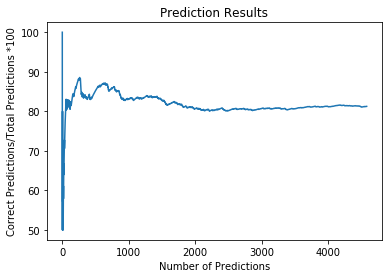

In [9]:
import matplotlib.pyplot as plt
plt.plot(percentages)
plt.ylabel('Correct Predictions/Total Predictions *100')
plt.xlabel('Number of Predictions')
plt.title('Prediction Results')
plt.show()

In [11]:
print("FIRST ITERATION CORRECT PERCENTAGE: ",float("{0:.1f}".format((float(numberOfCorrectTrials)/float(numberOfTrials))*100.0)),"%")

FIRST ITERATION CORRECT PERCENTAGE:  81.2 %


In [12]:
print("RANDOM CORRECT PERCENTAGE: ",float("{0:.1f}".format((float(correctRandom)/float(numberOfTrials))*100.0)),"%")

RANDOM CORRECT PERCENTAGE:  50.5 %
